# Lecture 22

## 9.3: Module 9 Notebook 3 ##

In [1]:
# HIDDEN
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
# Some functions for plotting. You don't have to understand how any
# of the functions in this cell work, since they use things we 
# haven't learned about in Data 8.


def resize_window(lim=3.5):
    plots.xlim(-lim, lim)
    plots.ylim(-lim, lim)
    
def draw_line(slope=0, intercept=0, x=make_array(-4, 4), color='r'):
    y = x*slope + intercept
    plots.plot(x, y, color=color)
    
def draw_vertical_line(x_position, color='black'):
    x = make_array(x_position, x_position)
    y = make_array(-4, 4)
    plots.plot(x, y, color=color)
    
def make_correlated_data(r):
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r*x + (np.sqrt(1-r**2))*z
    return x, y

def r_table(r):
    """
    Generate a table of 1000 x,y data points in standard units
    whose correlation is approximately equal to r
    """
    np.random.seed(8)
    x, y = make_correlated_data(r)
    return Table().with_columns('x', x, 'y', y)

## Linear regression: defining the line - Copying over useful line functions

In [3]:
def standard_units(x):
    """Converts an array x to standard units"""
    return (x - np.mean(x)) / np.std(x)

def correlation(t, x, y):
    x_su = standard_units(t.column(x))
    y_su = standard_units(t.column(y))
    return np.mean(x_su * y_su)


In [4]:
def slope(t, x, y):
    r = correlation(t, x, y)
    sd_y = np.std(t.column(y))
    sd_x = np.std(t.column(x))
    
    return r*(sd_y/sd_x)

def intercept(t, x, y):
    return np.mean(t.column(y)) - (slope(t, x, y) * np.mean(t.column(x)))

In [5]:
example = r_table(0.5)
slope(example, 'x', 'y')

0.50226382816259152

## Regression line vs other lines

In [6]:
def demographics_errors(slope, intercept):
    # Use four convenient points from the original data
    sample = [[14.7, 33995], [19.1, 61454], [50.7, 71183], [59.5, 105918]]
    demographics.scatter('College%', 'Median Income', alpha=0.5)
    xlims = make_array(5, 75)
    # Plot a line with the slope and intercept you specified:
    plots.plot(xlims, slope * xlims + intercept, lw=4)
    # Plot red lines from each of the four points to the line
    for x, y in sample:
        plots.plot([x, x], [y, slope * x + intercept], color='r', lw=4)

In [7]:
def fitted_values(t, x, y):
    """Return an array of the regressions estimates at all the x values"""
    a = slope(t, x, y)
    b = intercept(t, x, y)
    return a*t.column(x) + b

In [8]:
demographics = Table.read_table('district_demographics2016.csv')
demographics.show(5)

State,District,Median Income,Percent voting for Clinton,College%
Alabama,"Congressional District 1 (115th Congress), Alabama",47083,34.1,24
Alabama,"Congressional District 2 (115th Congress), Alabama",42035,33,21.8
Alabama,"Congressional District 3 (115th Congress), Alabama",46544,32.3,22.8
Alabama,"Congressional District 4 (115th Congress), Alabama",41110,17.4,17
Alabama,"Congressional District 5 (115th Congress), Alabama",51690,31.3,30.3


In [9]:
demographics = demographics.drop(
    'State', 'District', 'Percent voting for Clinton')
demographics.show(5)

Median Income,College%
47083,24
42035,21.8
46544,22.8
41110,17
51690,30.3


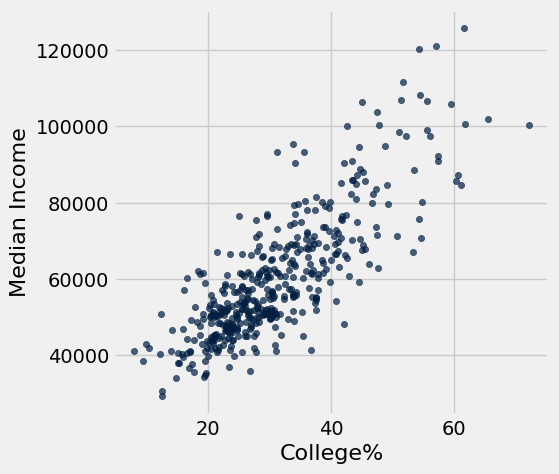

In [10]:
demographics.scatter('College%', 'Median Income')

In [11]:
correlation(demographics, 'College%', 'Median Income')

0.81846485171413352

In [12]:
regression_slope = slope(demographics, 'College%', 'Median Income')
regression_intercept = intercept(demographics, 'College%', 'Median Income')
regression_slope, regression_intercept

(1270.70168946388, 20802.577766677925)

In [13]:
predicted = fitted_values(demographics, 'College%', 'Median Income')

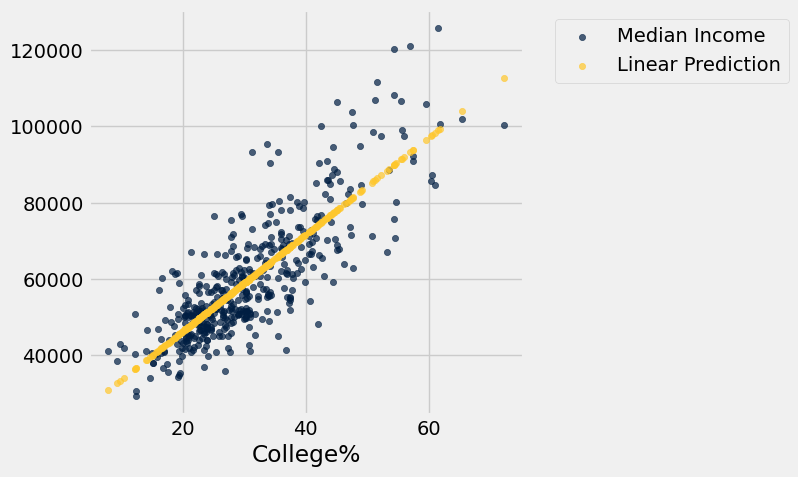

In [14]:
demographics = demographics.with_column(
    'Linear Prediction', predicted)
demographics.scatter('College%')

In [15]:
actual = demographics.column('Median Income')
errors = actual - predicted

In [16]:
demographics.with_column('Error', errors)

Median Income,College%,Linear Prediction,Error
47083,24,51299.4,-4216.42
42035,21.8,48503.9,-6468.87
46544,22.8,49774.6,-3230.58
41110,17,42404.5,-1294.51
51690,30.3,59304.8,-7614.84
61413,36.7,67437.3,-6024.33
34664,19.4,45454.2,-10790.2
76440,29.6,58415.3,18024.7
50537,24.5,51934.8,-1397.77
49072,34,64006.4,-14934.4


In [17]:
np.mean(errors)

6.3560089503211536e-13

In [18]:
np.mean(errors ** 2) ** 0.5

9398.5155885712811

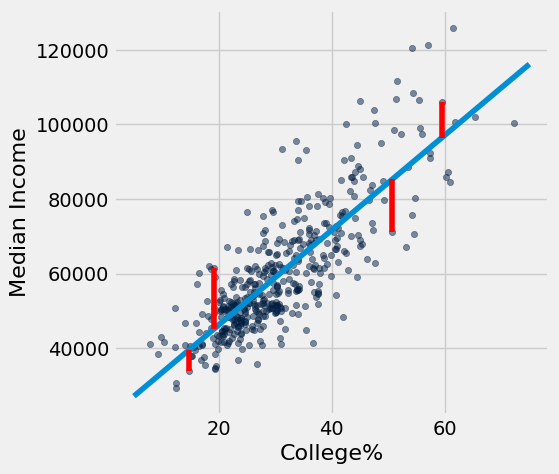

In [19]:
demographics_errors(regression_slope, regression_intercept)

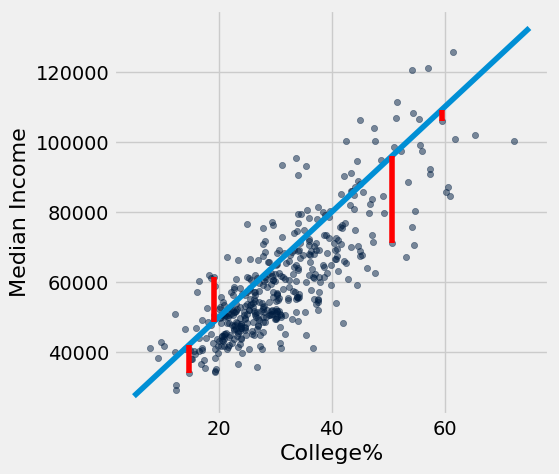

In [20]:
# takes any slope, any intercept

demographics_errors(1500, 20000)

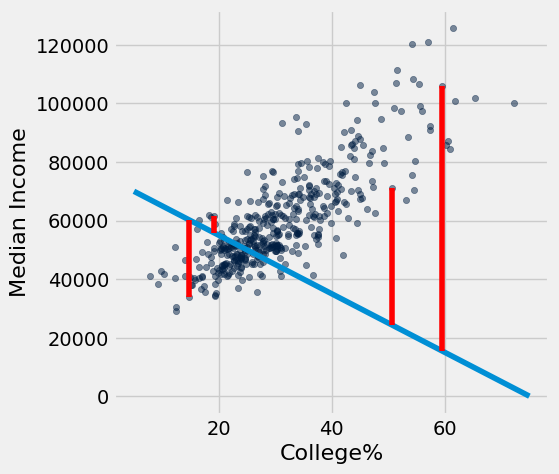

In [21]:
demographics_errors(-1000, 75000)

## Root Mean Square Error ###

In [22]:
def show_demographics_rmse(slope, intercept):
    demographics_errors(slope, intercept)
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    prediction = slope * x + intercept
    mse = np.mean((y - prediction) ** 2)
    print("Root mean squared error:", round(mse ** 0.5, 2))

Root mean squared error: 30247.88


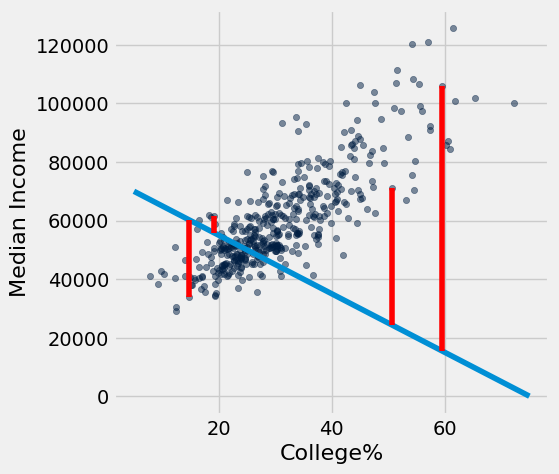

In [23]:
show_demographics_rmse(-1000, 75000)

Root mean squared error: 11559.09


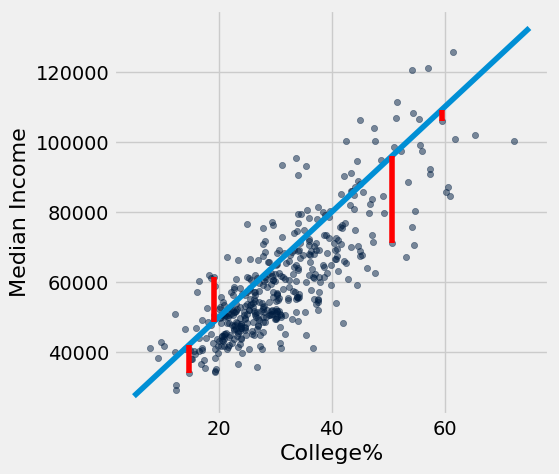

In [24]:
show_demographics_rmse(1500, 20000)

Root mean squared error: 9398.52


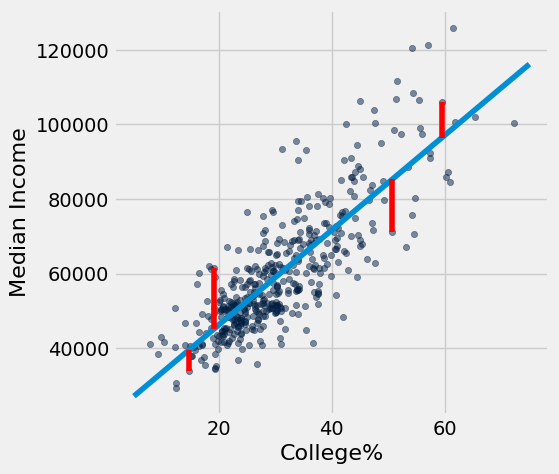

In [25]:
show_demographics_rmse(regression_slope, regression_intercept)

## Numerical Optimization ###

In [ ]:
# If we use the line 'prediction = ax+b' will have an mse that depends on the slope 'a' and the intercept 'b'

# We could define a function lw_mse that takes 
# the slope and intercept as its arguments and returns the corresponding mse.

# If we experiment with different values, we can find a low-error slope and intercept 
# through trial and error, but that would take a while. 

# Fortunately, there is a Python function that does all the trial and error for us.

# The minimize() function can be used to find the 
# *arguments* of a function for which the function returns its minimum value. 

# Python uses a similar trial-and-error approach, 
# following the changes that lead to incrementally lower output values.

#Let's see some examples of how minimize() works

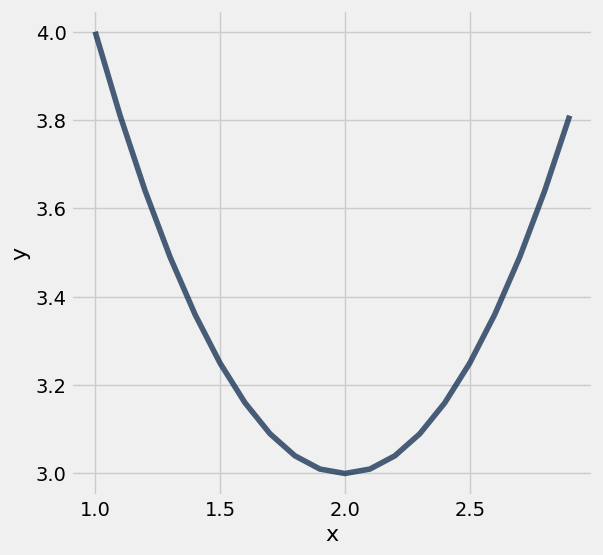

In [26]:
# Ex. 1. Minimize a quadratic equation
x = np.arange(1, 3, 0.1)
y = (x-2)**2 + 3
Table().with_columns('x', x, 'y', y).plot('x')

In [28]:
# Let's put the code above in a function
def f(x):
    return ((x-2)**2) + 3

In [29]:
# Now we can minimize it, call minimize(). Note, it takes a function as an argument
minimize(f)

1.9999999946252267

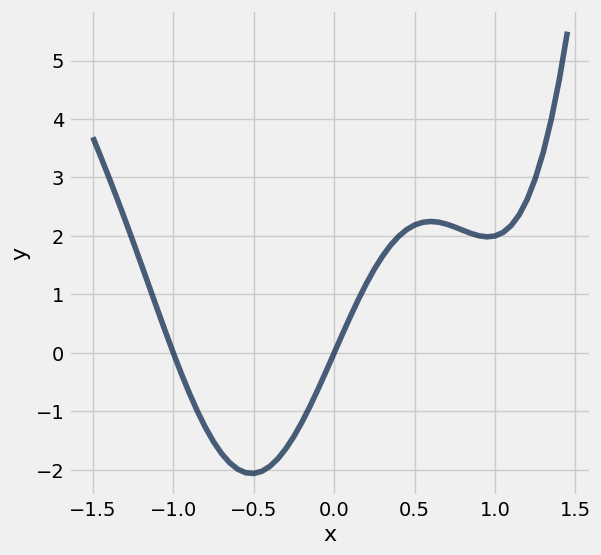

In [30]:
# Ex. 2: Minimize a sinusoidal function 
x = np.arange(-1.5, 1.5, 0.05)
y2 = 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 
Table().with_columns('x', x, 'y', y2).plot('x')

In [31]:
# Let's put the code in a function
def complicated_function(x):
    return 2 * np.sin(x*np.pi) + x ** 3 + x ** 4 

In [32]:
# Now, let's minimize it
minimize(complicated_function)

-0.5126437620940081

## Minimizing RMSE ##

In [ ]:
# Now that we have a sense of how minimize() works, 
# let's get back to attempting to find the 
# "best" slope and intercept values that minimize the rmse

In [33]:
# working with the demographics dataset still,
# we first define a function that returns RMSE
# when given a slope and intercept value
def demographics_rmse(any_slope, any_intercept):
    x = demographics.column('College%')
    y = demographics.column('Median Income')
    estimate = any_slope*x + any_intercept
    return (np.mean((y - estimate) ** 2)) ** 0.5

In [34]:
# Let's test it with a few values of slope and intercept

# test 1
demographics_rmse(1500, 20000)

11559.086490075999

In [35]:
# test 2
demographics_rmse(-1000, 75000)

30247.883767944502

In [36]:
# now, let's minimize RMSE and 
# obtain the values of slope and intercept 
# at the lowest value of RMSE

minimize(demographics_rmse)

array([  1270.70168805,  20802.57933807])

In [37]:
# Finally, let's confirm that the regression line
# is indeed the "best" fit, i.e., has the lowest RMSE. 
# We check that by comparing its slope and intercept, 
# with those obtained from minimize()

make_array(regression_slope, regression_intercept)

array([  1270.70168946,  20802.57776668])

### Nonlinear Regression ###

In [ ]:
# So far, we developed formulas for the slope and intercept 
# of the regression line through a football shaped scatter diagram. 

# It turns out that the slope and intercept 
# of the least squares line have the same formulas 
# as those we developed, regardless of the shape of the scatter plot.

# Let's examine a different dataset, shotput.csv
# In this data, female atheletes throw a shotput, 
# and their furthest throw is recorded.

# We will examine how that distance compares to their strength
# which is measures in how much weight in kgs,
# they can lift in 1 RM.

In [38]:
shotput = Table.read_table('shotput.csv')
shotput

Weight Lifted,Shot Put Distance
37.5,6.4
51.5,10.2
61.3,12.4
61.3,13
63.6,13.2
66.1,13
70,12.7
92.7,13.9
90.5,15.5
90.5,15.8


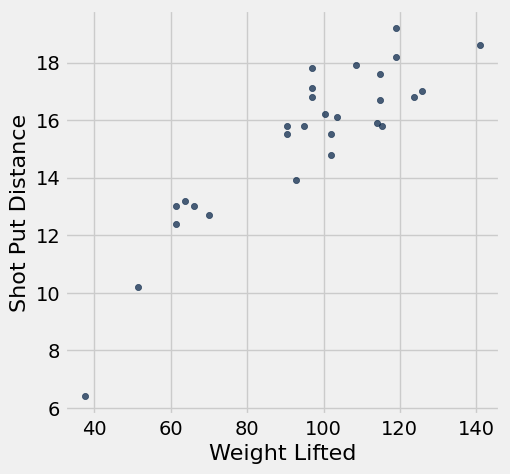

In [39]:
shotput.scatter('Weight Lifted')
# Notice that, this is NOT a football shaped scatter plot. 
# In fact, it seems to have a slight non-linear component

In [40]:
# As before, let's define a function
# to compute RMSE when presented with 
# slope and intercept of a line
def shotput_linear_rmse(any_slope, any_intercept):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = any_slope*x + any_intercept
    return np.mean((y - estimate) ** 2) ** 0.5

In [41]:
# We will then call minimize()
# to obtain the values of slope and intercept
# for the line with the lowest RMSE
best_line = minimize(shotput_linear_rmse)
best_line

array([ 0.09834382,  5.95962883])

In [42]:
# Let's compare these with the values of the regression line
# we will use the slope and intercept methods we defined previously

make_array(slope(shotput, 'Weight Lifted', 'Shot Put Distance'), 
           intercept(shotput, 'Weight Lifted', 'Shot Put Distance'))

array([ 0.09834382,  5.9596291 ])

In [ ]:
# the two arrays are quite similar
# We conclude that:
# No matter what the shape of the scatter plot, 
# there is a unique line that minimizes the mean squared error of estimation. 

# It is called the regression line, and its slope and intercept are given by
# the equations we defined previously

In [43]:
# We can therefore use the slope and intercept 
# obtained using the minimize function,
# to plot the regression line 

# First, we read "Weight Lifted" and save it in weights. 
# This is our 'x' value
weights = shotput.column(0)

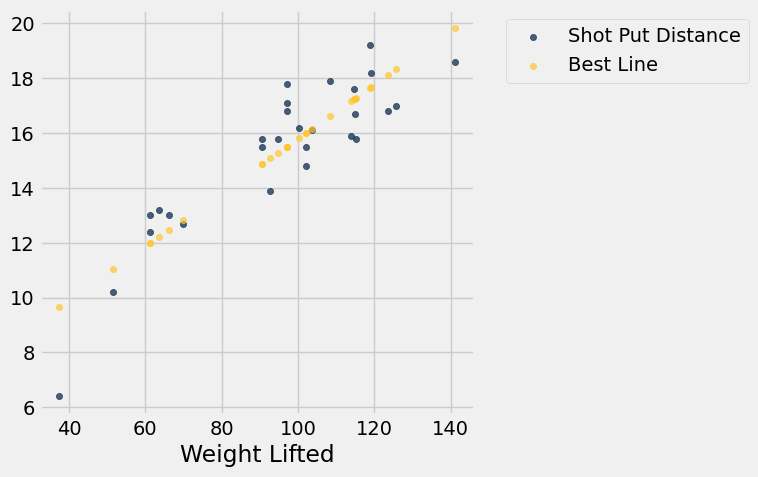

In [44]:
# Next, we compute the prediction, i.e., y_estimate
# our 'y' is the "Shot Put Distance"

# The line equation is estimated_y = slope * x + intercept

# best_line contains, slope, and intercept in that order

linear_fit = best_line.item(0)*weights + best_line.item(1)

shotput.with_column(
    'Best Line', linear_fit
).scatter(0)

In [ ]:
# Suppose a linear function isn't the best fit for the data?
# What if a quadratic function fit the data better?

# Quadratic functions have the form below

**Quadratic Function**

$$
f(x) ~=~ ax^2 + bx + c
$$
for constants $a$, $b$, and $c$.



In [45]:
# We can still use the least squares (RMSE)
# to compute the size of errors even with a quadratic equation

# the only thing that changes is that now our functio takes in 
# 3 parameters instead of 2
def shotput_quadratic_rmse(a, b, c):
    x = shotput.column('Weight Lifted')
    y = shotput.column('Shot Put Distance')
    estimate = a*(x**2) + b*x + c # notice that our estimate is now computed through a quadratic eqn
    return np.mean((y - estimate) ** 2) ** 0.5

In [46]:
# Minimize will return to us the values for a, b, and c
# that return the least RMSE
best_quad = minimize(shotput_quadratic_rmse)
best_quad

array([ -1.04003731e-03,   2.82706003e-01,  -1.53167618e+00])

In [47]:
# suppose x = weight lifted = 100 kg
# Then predicted shot put distance:

(-0.00104)*(100**2) + 0.2827*100 - 1.5318

16.3382

In [48]:
# Let's obtained the predicted shot put distances 
# using a quadratic function/predictor
quad_fit = best_quad.item(0)*(weights**2) + best_quad.item(1)*weights + best_quad.item(2)

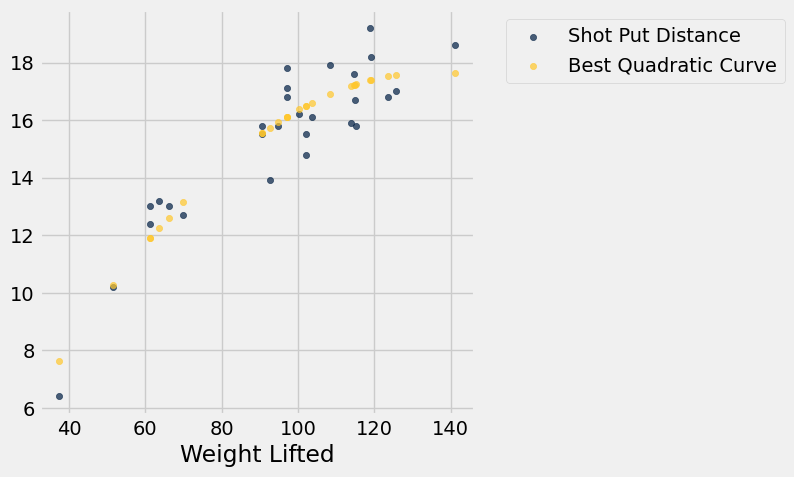

In [49]:
# and visualize them
shotput.with_column('Best Quadratic Curve', quad_fit).scatter(0)

In [ ]:
# Notice the curve, especially on the top right of the plot. 
# Is this a better fit for the data compared with the linear predictor?

# We will discuss model diagnostics next